In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [2]:
user_engagement=pd.read_csv("takehome_user_engagement.csv")
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
user_engagement.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
#converting time_stamp from object to datetime64
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [5]:
#sort values as per time stamp
user_engagement = user_engagement.sort_values(['time_stamp'])
user_engagement.head()

,time_stamp,user_id,visited
178140,2012-05-31 08:20:06,10012,1
59486,2012-05-31 15:47:36,3428,1
175638,2012-05-31 17:19:37,9899,1
26821,2012-05-31 21:58:33,1693,1
109716,2012-06-01 00:17:30,6102,1


In [6]:
user_engagement = user_engagement.set_index("time_stamp")
user_engagement.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [7]:
#grouping the data by time_stamp data with freq as week according to user_id
adopted_user=user_engagement.groupby(['user_id',pd.Grouper(freq="1W")])['visited'].sum()
adopted_user.head()

user_id  time_stamp
1        2014-04-27    1
2        2013-11-17    1
         2013-12-01    1
         2013-12-15    1
         2013-12-29    1
Name: visited, dtype: int64

In [8]:
adopted_user=adopted_user.unstack()
adopted_user

time_stamp,2012-06-03,2012-06-10,2012-06-17,2012-06-24,2012-07-01,2012-07-08,2012-07-15,2012-07-22,2012-07-29,2012-08-05,...,2014-04-06,2014-04-13,2014-04-20,2014-04-27,2014-05-04,2014-05-11,2014-05-18,2014-05-25,2014-06-01,2014-06-08
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#converting to columns
column = list(adopted_user.columns)
column[0:5]

[Timestamp('2012-06-03 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-10 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-17 00:00:00', freq='W-SUN'),
 Timestamp('2012-06-24 00:00:00', freq='W-SUN'),
 Timestamp('2012-07-01 00:00:00', freq='W-SUN')]

In [10]:
adopted_user['logins_per_week']=adopted_user[column].max(axis=1)
adopted_user['logins_per_week'].head()

user_id
1    1.0
2    3.0
3    1.0
4    1.0
5    1.0
Name: logins_per_week, dtype: float64

In [11]:
#resetting index or combining later
max_logins=adopted_user[['logins_per_week']].reset_index()


In [12]:
max_logins['adopted']=(max_logins['logins_per_week']>=3).astype(int)
max_logins.head()

time_stamp,user_id,logins_per_week,adopted
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [13]:
adopted_data=max_logins[['user_id','adopted']]
adopted_data.head()

time_stamp,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [14]:
users=pd.read_csv("takehome_users.csv")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


#### deal with numerical data 

In [16]:
users=users.dropna(subset=['last_session_creation_time'])
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 758.2+ KB


In [17]:
#Rename column to merge "user_id"

users.rename(columns={"object_id": "user_id"}, inplace=True)

In [18]:
merged_data=adopted_data.merge(users,on='user_id')
merged_data.head()

,user_id,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8823 non-null   int64  
 1   adopted                     8823 non-null   int32  
 2   creation_time               8823 non-null   object 
 3   name                        8823 non-null   object 
 4   email                       8823 non-null   object 
 5   creation_source             8823 non-null   object 
 6   last_session_creation_time  8823 non-null   float64
 7   opted_in_to_mailing_list    8823 non-null   int64  
 8   enabled_for_marketing_drip  8823 non-null   int64  
 9   org_id                      8823 non-null   int64  
 10  invited_by_user_id          4776 non-null   float64
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 792.7+ KB


In [20]:
#convert creation_time,last_session_creation_time to datetime64
merged_data['creation_time']=pd.to_datetime(merged_data['creation_time'])
merged_data['last_session_creation_time']=pd.to_datetime(merged_data['last_session_creation_time'],unit='s')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   adopted                     8823 non-null   int32         
 2   creation_time               8823 non-null   datetime64[ns]
 3   name                        8823 non-null   object        
 4   email                       8823 non-null   object        
 5   creation_source             8823 non-null   object        
 6   last_session_creation_time  8823 non-null   datetime64[ns]
 7   opted_in_to_mailing_list    8823 non-null   int64         
 8   enabled_for_marketing_drip  8823 non-null   int64         
 9   org_id                      8823 non-null   int64         
 10  invited_by_user_id          4776 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(4), ob

In [21]:
#Calculate active days of a user to analyse
merged_data['active_days']=(merged_data["last_session_creation_time"]-merged_data["creation_time"]).dt.days

In [22]:
#to find the users joined by year
merged_data['year_joined'] = merged_data['creation_time'].dt.year

In [23]:
merged_data["adopted"].value_counts()

0    7378
1    1445
Name: adopted, dtype: int64

In [24]:
# nan vales in invited_by_user_id
merged_data['invited_by_user_id'] = merged_data['invited_by_user_id'].fillna(0)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   adopted                     8823 non-null   int32         
 2   creation_time               8823 non-null   datetime64[ns]
 3   name                        8823 non-null   object        
 4   email                       8823 non-null   object        
 5   creation_source             8823 non-null   object        
 6   last_session_creation_time  8823 non-null   datetime64[ns]
 7   opted_in_to_mailing_list    8823 non-null   int64         
 8   enabled_for_marketing_drip  8823 non-null   int64         
 9   org_id                      8823 non-null   int64         
 10  invited_by_user_id          8823 non-null   float64       
 11  active_days                 8823 non-null   int64       

In [25]:
merged_data['creation_source'].nunique()

5

In [26]:
#dropping name,email,creation_source column as its not necessary for analysis
merged_data.drop(['name','email'],axis=1,inplace=True)

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     8823 non-null   int64         
 1   adopted                     8823 non-null   int32         
 2   creation_time               8823 non-null   datetime64[ns]
 3   creation_source             8823 non-null   object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    8823 non-null   int64         
 6   enabled_for_marketing_drip  8823 non-null   int64         
 7   org_id                      8823 non-null   int64         
 8   invited_by_user_id          8823 non-null   float64       
 9   active_days                 8823 non-null   int64         
 10  year_joined                 8823 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(6), ob

In [35]:
#No of people joined every year based of creation_source
px.histogram(merged_data, x='year_joined', color="creation_source", barmode='group')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

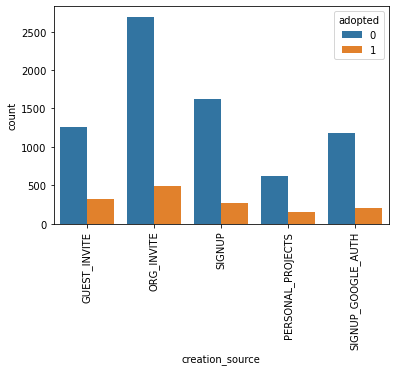

In [31]:
#Adopted vs creation source
ad_vs_cs=sns.countplot(x='creation_source', data=merged_data, hue='adopted',orient='v')
plt.xticks(rotation=90)

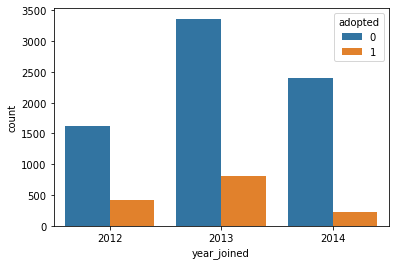

In [32]:
#adopted vs year joined
ad_vs_active=sns.countplot(x='year_joined', data=merged_data, hue='adopted',orient='h')

In [74]:
fig=px.histogram(merged_data,x='active_days',color='adopted',log_y=True)
fig.update_layout(xaxis_title="Active days",yaxis_title="No of users")

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

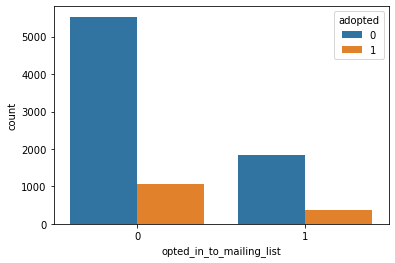

In [78]:
sns.countplot(x='opted_in_to_mailing_list', data=merged_data, hue='adopted',orient='v')

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

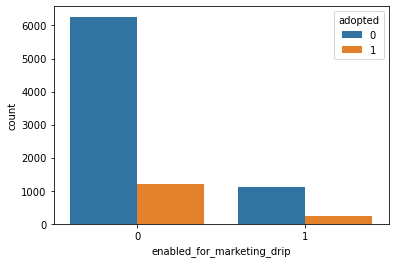

In [79]:
sns.countplot(x='enabled_for_marketing_drip', data=merged_data, hue='adopted',orient='h')